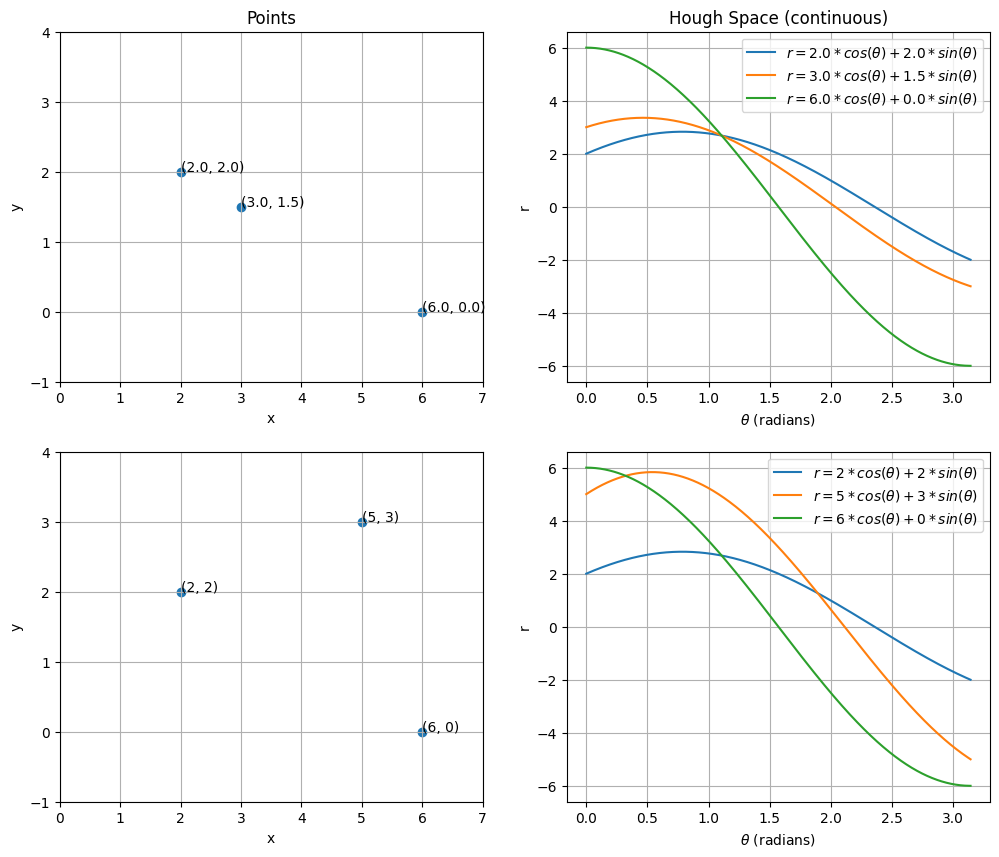

In [97]:
import numpy as np
import matplotlib.pyplot as plt

points_a = np.array([[2, 2], [3, 1.5], [6, 0]])
points_b = np.array([[2, 2], [5, 3], [6, 0]])

theta = np.linspace(0, np.pi, 1000)

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.scatter(points_a[:, 0], points_a[:, 1])
for (x, y) in points_a:
    plt.text(x, y, f'({x}, {y})')
plt.xlim(0, 7)
plt.ylim(-1, 4)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title("Points")

plt.subplot(2, 2, 2)
for (x, y) in points_a:
    r = x*np.cos(theta) + y*np.sin(theta)
    plt.plot(theta, r, label=f"$r = {x}*cos(\\theta) + {y}*sin(\\theta)$")

plt.grid(True)
plt.ylabel("r")
plt.xlabel(r"$\theta$ (radians)")
plt.legend()
plt.title("Hough Space (continuous)")

plt.subplot(2, 2, 3)
plt.scatter(points_b[:, 0], points_b[:, 1])
for (x, y) in points_b:
    plt.text(x, y, f'({x}, {y})')
plt.xlim(0, 7)
plt.ylim(-1, 4)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.subplot(2, 2, 4)
for (x, y) in points_b:
    r = x*np.cos(theta) + y*np.sin(theta)
    plt.plot(theta, r, label=f"$r = {x}*cos(\\theta) + {y}*sin(\\theta)$")

plt.grid(True)
plt.ylabel("r")
plt.xlabel(r"$\theta$ (radians)")
plt.legend()

plt.show()

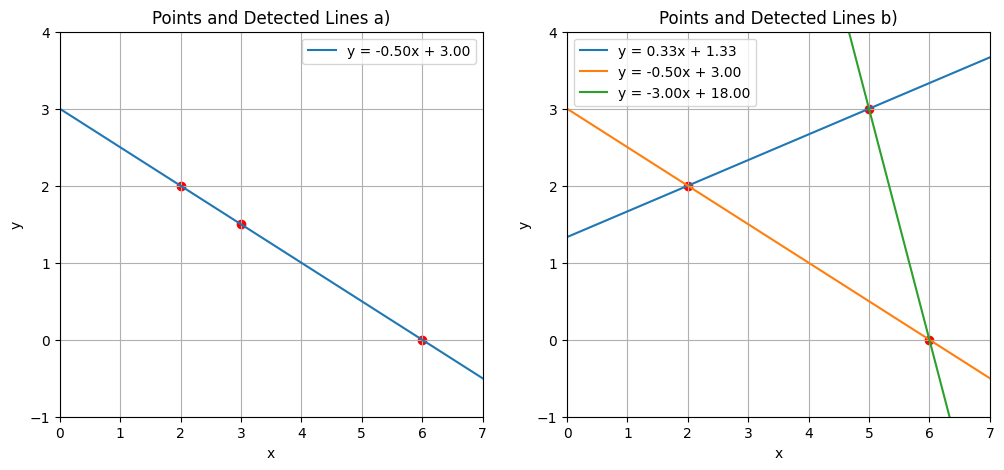

In [ ]:
from scipy.optimize import fsolve

def r1(theta):
    return 2*np.cos(theta) + 2*np.sin(theta)

def r2(theta):
    return 3*np.cos(theta) + 1.5*np.sin(theta)

def r3(theta):
    return 6*np.cos(theta) + 0*np.sin(theta)

def r2_b(theta):
    return 5*np.cos(theta) + 3*np.sin(theta)

def find_intersection(func1, func2, theta_guess):
    # func1 = func2 -> 0 = func1 - func2, fsolve finds root
    i_theta = fsolve(lambda theta: func1(theta) - func2(theta), theta_guess)
    i_r = func1(i_theta)
    return i_theta, i_r


# a)
theta_guess = 1
i_theta, i_r = find_intersection(r1, r2, theta_guess)
a = -(np.cos(i_theta)/np.sin(i_theta))
b = i_r/np.sin(i_theta)

x = np.linspace(0, 8, 100)
y = a*x + b

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y, label=f'y = {a[0]:.2f}x + {b[0]:.2f}')
plt.xlim(0, 7)
plt.ylim(-1, 4)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.scatter(points_a[:, 0], points_a[:, 1], color="red")
plt.legend()
plt.title("Points and Detected Lines a)")



# b)

# intersection 1
i_theta, i_r = find_intersection(r1, r2_b, theta_guess)

# conversion to y = ax + b
a = -(np.cos(i_theta)/np.sin(i_theta))
b = i_r/np.sin(i_theta)
y1 = a*x + b

plt.subplot(1, 2, 2)
plt.plot(x, y1, label=f"y = {a[0]:.2f}x + {b[0]:.2f}")

# intersection 2
i_theta, i_r = find_intersection(r1, r3, theta_guess)

# conversion to y = ax + b
a = -(np.cos(i_theta)/np.sin(i_theta))
b = i_r/np.sin(i_theta)
y2 = a*x + b

plt.plot(x, y2, label=f"y = {a[0]:.2f}x + {b[0]:.2f}")

# intersection 3
i_theta, i_r = find_intersection(r2_b, r3, theta_guess)

# conversion to y = ax + b
a = -(np.cos(i_theta)/np.sin(i_theta))
b = i_r/np.sin(i_theta)
y3 = a*x + b

plt.plot(x, y3, label=f"y = {a[0]:.2f}x + {b[0]:.2f}")

plt.xlim(0, 7)
plt.ylim(-1, 4)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.scatter(points_b[:, 0], points_b[:, 1], color="red")
plt.legend()
plt.title("Points and Detected Lines b)")


plt.show()